In [8]:
import pandas as pd
dataset = pd.read_csv("./datasets/TBPR_HISTORICAL_MOVEMENTS_202211021157.csv", sep=";")
dataset.head()

,DT_REFERENCE,CASHPOINT_ID,QT_OUT,QT_IN_L4FIT,QT_IN_L4UNFIT,QT_RECYCLED,QT_L3,QT_L2,FL_MISSING,VA_DENOMINATION,CURRENCY_UNIT_ID,CO_CURRENCY,SUBGROUP,QT_CHARGE_IN,QT_CHARGE_OUT
0,2021-07-16 00:00:00.000,2,2,0,0,0,0,0,0,20.0,3,EUR,1,162,164
1,2021-07-16 00:00:00.000,2,0,0,0,0,0,0,0,50.0,4,EUR,1,174,174
2,2021-07-19 00:00:00.000,2,1,0,0,0,0,0,0,20.0,3,EUR,1,0,0
3,2021-07-19 00:00:00.000,2,0,0,0,0,0,0,1,50.0,4,EUR,1,0,0
4,2021-07-22 00:00:00.000,2,0,0,0,0,0,0,0,20.0,3,EUR,1,0,80


In [ ]:
CASH_POINT_ID = dataset.CASHPOINT_ID.unique()
for cashPoint in CASH_POINT_ID:
    dataset_temp = dataset[dataset.CASHPOINT_ID == cashPoint]
    dataset_temp = dataset_temp.groupby("DT_REFERENCE").sum()
    print("------------------------------------------------------------------------------------------")
    print(cashPoint, "\n")
    print(dataset_temp.describe())
    print("\n")


# Viene scelto il cashpoint 4 per la sua cardinalità e per la varietà di banconote presenti

In [ ]:
gretel = dataset[dataset.CASHPOINT_ID == 4]
gretel.drop(["CASHPOINT_ID","QT_L3","QT_L2", "CURRENCY_UNIT_ID", "CO_CURRENCY", "SUBGROUP"], axis=1, inplace=True)

In [ ]:
gretel.describe()

# Trasformazione del dataset

## Primo approccio

In [ ]:
type_banconota = gretel.VA_DENOMINATION.unique()
for i in type_banconota:
    gretel["QT_OUT_"+str(int(i))] = gretel["QT_OUT"]
    gretel["QT_IN_L4FIT_"+str(int(i))] = gretel["QT_IN_L4FIT"]
    gretel["QT_IN_L4UNFIT_"+str(int(i))] = gretel["QT_IN_L4UNFIT"]
    gretel["QT_RECYCLED_"+str(int(i))] = gretel["QT_RECYCLED"]
    gretel["FL_MISSING_"+str(int(i))] = gretel["FL_MISSING"]
    gretel["QT_CHARGE_IN_"+str(int(i))] = gretel["QT_CHARGE_IN"]
    gretel["QT_CHARGE_OUT_"+str(int(i))] = gretel["QT_CHARGE_OUT"]
gretel.drop(["QT_OUT","QT_IN_L4FIT","QT_IN_L4UNFIT", "QT_RECYCLED", "FL_MISSING", "QT_CHARGE_IN", "QT_CHARGE_OUT"], axis=1, inplace=True)

In [ ]:
# cp5.loc[cp5.index == 330, "VALUE_CHARGE_IN"] = 0
def procedure():
    gretel.loc[gretel.VA_DENOMINATION == 20, "QT_OUT_50"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 20, "QT_IN_L4FIT_50"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 20, "QT_IN_L4UNFIT_50"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 20, "QT_RECYCLED_50"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 20, "FL_MISSING_50"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 20, "QT_CHARGE_IN_50"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 20, "QT_CHARGE_OUT_50"] = 0

    gretel.loc[gretel.VA_DENOMINATION == 20, "QT_OUT_10"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 20, "QT_IN_L4FIT_10"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 20, "QT_IN_L4UNFIT_10"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 20, "QT_RECYCLED_10"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 20, "FL_MISSING_10"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 20, "QT_CHARGE_IN_10"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 20, "QT_CHARGE_OUT_10"] = 0

    gretel.loc[gretel.VA_DENOMINATION == 20, "QT_OUT_5"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 20, "QT_IN_L4FIT_5"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 20, "QT_IN_L4UNFIT_5"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 20, "QT_RECYCLED_5"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 20, "FL_MISSING_5"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 20, "QT_CHARGE_IN_5"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 20, "QT_CHARGE_OUT_5"] = 0

    gretel.loc[gretel.VA_DENOMINATION == 20, "QT_OUT_100"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 20, "QT_IN_L4FIT_100"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 20, "QT_IN_L4UNFIT_100"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 20, "QT_RECYCLED_100"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 20, "FL_MISSING_100"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 20, "QT_CHARGE_IN_100"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 20, "QT_CHARGE_OUT_100"] = 0

    gretel.loc[gretel.VA_DENOMINATION == 20, "QT_OUT_200"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 20, "QT_IN_L4FIT_200"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 20, "QT_IN_L4UNFIT_200"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 20, "QT_RECYCLED_200"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 20, "FL_MISSING_200"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 20, "QT_CHARGE_IN_200"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 20, "QT_CHARGE_OUT_200"] = 0

    gretel.loc[gretel.VA_DENOMINATION == 20, "QT_OUT_500"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 20, "QT_IN_L4FIT_500"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 20, "QT_IN_L4UNFIT_500"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 20, "QT_RECYCLED_500"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 20, "FL_MISSING_500"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 20, "QT_CHARGE_IN_500"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 20, "QT_CHARGE_OUT_500"] = 0
        
    gretel.loc[gretel.VA_DENOMINATION == 50, "QT_OUT_20"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 50, "QT_IN_L4FIT_20"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 50, "QT_IN_L4UNFIT_20"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 50, "QT_RECYCLED_20"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 50, "FL_MISSING_20"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 50, "QT_CHARGE_IN_20"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 50, "QT_CHARGE_OUT_20"] = 0

    gretel.loc[gretel.VA_DENOMINATION == 50, "QT_OUT_10"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 50, "QT_IN_L4FIT_10"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 50, "QT_IN_L4UNFIT_10"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 50, "QT_RECYCLED_10"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 50, "FL_MISSING_10"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 50, "QT_CHARGE_IN_10"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 50, "QT_CHARGE_OUT_10"] = 0

    gretel.loc[gretel.VA_DENOMINATION == 50, "QT_OUT_5"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 50, "QT_IN_L4FIT_5"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 50, "QT_IN_L4UNFIT_5"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 50, "QT_RECYCLED_5"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 50, "FL_MISSING_5"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 50, "QT_CHARGE_IN_5"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 50, "QT_CHARGE_OUT_5"] = 0

    gretel.loc[gretel.VA_DENOMINATION == 50, "QT_OUT_100"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 50, "QT_IN_L4FIT_100"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 50, "QT_IN_L4UNFIT_100"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 50, "QT_RECYCLED_100"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 50, "FL_MISSING_100"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 50, "QT_CHARGE_IN_100"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 50, "QT_CHARGE_OUT_100"] = 0

    gretel.loc[gretel.VA_DENOMINATION == 50, "QT_OUT_200"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 50, "QT_IN_L4FIT_200"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 50, "QT_IN_L4UNFIT_200"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 50, "QT_RECYCLED_200"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 50, "FL_MISSING_200"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 50, "QT_CHARGE_IN_200"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 50, "QT_CHARGE_OUT_200"] = 0

    gretel.loc[gretel.VA_DENOMINATION == 50, "QT_OUT_500"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 50, "QT_IN_L4FIT_500"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 50, "QT_IN_L4UNFIT_500"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 50, "QT_RECYCLED_500"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 50, "FL_MISSING_500"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 50, "QT_CHARGE_IN_500"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 50, "QT_CHARGE_OUT_500"] = 0

    gretel.loc[gretel.VA_DENOMINATION == 10, "QT_OUT_20"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 10, "QT_IN_L4FIT_20"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 10, "QT_IN_L4UNFIT_20"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 10, "QT_RECYCLED_20"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 10, "FL_MISSING_20"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 10, "QT_CHARGE_IN_20"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 10, "QT_CHARGE_OUT_20"] = 0

    gretel.loc[gretel.VA_DENOMINATION == 10, "QT_OUT_50"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 10, "QT_IN_L4FIT_50"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 10, "QT_IN_L4UNFIT_50"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 10, "QT_RECYCLED_50"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 10, "FL_MISSING_50"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 10, "QT_CHARGE_IN_50"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 10, "QT_CHARGE_OUT_50"] = 0

    gretel.loc[gretel.VA_DENOMINATION == 10, "QT_OUT_5"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 10, "QT_IN_L4FIT_5"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 10, "QT_IN_L4UNFIT_5"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 10, "QT_RECYCLED_5"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 10, "FL_MISSING_5"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 10, "QT_CHARGE_IN_5"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 10, "QT_CHARGE_OUT_5"] = 0

    gretel.loc[gretel.VA_DENOMINATION == 10, "QT_OUT_100"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 10, "QT_IN_L4FIT_100"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 10, "QT_IN_L4UNFIT_100"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 10, "QT_RECYCLED_100"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 10, "FL_MISSING_100"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 10, "QT_CHARGE_IN_100"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 10, "QT_CHARGE_OUT_100"] = 0

    gretel.loc[gretel.VA_DENOMINATION == 10, "QT_OUT_200"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 10, "QT_IN_L4FIT_200"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 10, "QT_IN_L4UNFIT_200"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 10, "QT_RECYCLED_200"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 10, "FL_MISSING_200"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 10, "QT_CHARGE_IN_200"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 10, "QT_CHARGE_OUT_200"] = 0

    gretel.loc[gretel.VA_DENOMINATION == 10, "QT_OUT_500"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 10, "QT_IN_L4FIT_500"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 10, "QT_IN_L4UNFIT_500"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 10, "QT_RECYCLED_500"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 10, "FL_MISSING_500"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 10, "QT_CHARGE_IN_500"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 10, "QT_CHARGE_OUT_500"] = 0

    gretel.loc[gretel.VA_DENOMINATION == 5, "QT_OUT_20"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 5, "QT_IN_L4FIT_20"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 5, "QT_IN_L4UNFIT_20"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 5, "QT_RECYCLED_20"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 5, "FL_MISSING_20"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 5, "QT_CHARGE_IN_20"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 5, "QT_CHARGE_OUT_20"] = 0

    gretel.loc[gretel.VA_DENOMINATION == 5, "QT_OUT_50"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 5, "QT_IN_L4FIT_50"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 5, "QT_IN_L4UNFIT_50"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 5, "QT_RECYCLED_50"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 5, "FL_MISSING_50"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 5, "QT_CHARGE_IN_50"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 5, "QT_CHARGE_OUT_50"] = 0

    gretel.loc[gretel.VA_DENOMINATION == 5, "QT_OUT_10"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 5, "QT_IN_L4FIT_10"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 5, "QT_IN_L4UNFIT_10"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 5, "QT_RECYCLED_10"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 5, "FL_MISSING_10"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 5, "QT_CHARGE_IN_10"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 5, "QT_CHARGE_OUT_10"] = 0

    gretel.loc[gretel.VA_DENOMINATION == 5, "QT_OUT_100"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 5, "QT_IN_L4FIT_100"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 5, "QT_IN_L4UNFIT_100"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 5, "QT_RECYCLED_100"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 5, "FL_MISSING_100"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 5, "QT_CHARGE_IN_100"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 5, "QT_CHARGE_OUT_100"] = 0

    gretel.loc[gretel.VA_DENOMINATION == 5, "QT_OUT_200"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 5, "QT_IN_L4FIT_200"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 5, "QT_IN_L4UNFIT_200"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 5, "QT_RECYCLED_200"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 5, "FL_MISSING_200"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 5, "QT_CHARGE_IN_200"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 5, "QT_CHARGE_OUT_200"] = 0

    gretel.loc[gretel.VA_DENOMINATION == 5, "QT_OUT_500"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 5, "QT_IN_L4FIT_500"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 5, "QT_IN_L4UNFIT_500"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 5, "QT_RECYCLED_500"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 5, "FL_MISSING_500"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 5, "QT_CHARGE_IN_500"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 5, "QT_CHARGE_OUT_500"] = 0

    gretel.loc[gretel.VA_DENOMINATION == 100, "QT_OUT_20"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 100, "QT_IN_L4FIT_20"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 100, "QT_IN_L4UNFIT_20"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 100, "QT_RECYCLED_20"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 100, "FL_MISSING_20"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 100, "QT_CHARGE_IN_20"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 100, "QT_CHARGE_OUT_20"] = 0

    gretel.loc[gretel.VA_DENOMINATION == 100, "QT_OUT_50"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 100, "QT_IN_L4FIT_50"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 100, "QT_IN_L4UNFIT_50"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 100, "QT_RECYCLED_50"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 100, "FL_MISSING_50"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 100, "QT_CHARGE_IN_50"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 100, "QT_CHARGE_OUT_50"] = 0

    gretel.loc[gretel.VA_DENOMINATION == 100, "QT_OUT_10"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 100, "QT_IN_L4FIT_10"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 100, "QT_IN_L4UNFIT_10"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 100, "QT_RECYCLED_10"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 100, "FL_MISSING_10"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 100, "QT_CHARGE_IN_10"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 100, "QT_CHARGE_OUT_10"] = 0

    gretel.loc[gretel.VA_DENOMINATION == 100, "QT_OUT_5"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 100, "QT_IN_L4FIT_5"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 100, "QT_IN_L4UNFIT_5"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 100, "QT_RECYCLED_5"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 100, "FL_MISSING_5"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 100, "QT_CHARGE_IN_5"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 100, "QT_CHARGE_OUT_5"] = 0

    gretel.loc[gretel.VA_DENOMINATION == 100, "QT_OUT_200"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 100, "QT_IN_L4FIT_200"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 100, "QT_IN_L4UNFIT_200"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 100, "QT_RECYCLED_200"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 100, "FL_MISSING_200"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 100, "QT_CHARGE_IN_200"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 100, "QT_CHARGE_OUT_200"] = 0

    gretel.loc[gretel.VA_DENOMINATION == 100, "QT_OUT_500"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 100, "QT_IN_L4FIT_500"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 100, "QT_IN_L4UNFIT_500"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 100, "QT_RECYCLED_500"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 100, "FL_MISSING_500"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 100, "QT_CHARGE_IN_500"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 100, "QT_CHARGE_OUT_500"] = 0

    gretel.loc[gretel.VA_DENOMINATION == 200, "QT_OUT_20"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 200, "QT_IN_L4FIT_20"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 200, "QT_IN_L4UNFIT_20"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 200, "QT_RECYCLED_20"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 200, "FL_MISSING_20"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 200, "QT_CHARGE_IN_20"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 200, "QT_CHARGE_OUT_20"] = 0

    gretel.loc[gretel.VA_DENOMINATION == 200, "QT_OUT_50"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 200, "QT_IN_L4FIT_50"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 200, "QT_IN_L4UNFIT_50"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 200, "QT_RECYCLED_50"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 200, "FL_MISSING_50"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 200, "QT_CHARGE_IN_50"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 200, "QT_CHARGE_OUT_50"] = 0

    gretel.loc[gretel.VA_DENOMINATION == 200, "QT_OUT_10"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 200, "QT_IN_L4FIT_10"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 200, "QT_IN_L4UNFIT_10"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 200, "QT_RECYCLED_10"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 200, "FL_MISSING_10"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 200, "QT_CHARGE_IN_10"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 200, "QT_CHARGE_OUT_10"] = 0

    gretel.loc[gretel.VA_DENOMINATION == 200, "QT_OUT_5"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 200, "QT_IN_L4FIT_5"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 200, "QT_IN_L4UNFIT_5"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 200, "QT_RECYCLED_5"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 200, "FL_MISSING_5"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 200, "QT_CHARGE_IN_5"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 200, "QT_CHARGE_OUT_5"] = 0

    gretel.loc[gretel.VA_DENOMINATION == 200, "QT_OUT_100"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 200, "QT_IN_L4FIT_100"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 200, "QT_IN_L4UNFIT_100"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 200, "QT_RECYCLED_100"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 200, "FL_MISSING_100"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 200, "QT_CHARGE_IN_100"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 200, "QT_CHARGE_OUT_100"] = 0

    gretel.loc[gretel.VA_DENOMINATION == 200, "QT_OUT_500"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 200, "QT_IN_L4FIT_500"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 200, "QT_IN_L4UNFIT_500"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 200, "QT_RECYCLED_500"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 200, "FL_MISSING_500"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 200, "QT_CHARGE_IN_500"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 200, "QT_CHARGE_OUT_500"] = 0

    gretel.loc[gretel.VA_DENOMINATION == 500, "QT_OUT_20"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 500, "QT_IN_L4FIT_20"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 500, "QT_IN_L4UNFIT_20"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 500, "QT_RECYCLED_20"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 500, "FL_MISSING_20"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 500, "QT_CHARGE_IN_20"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 500, "QT_CHARGE_OUT_20"] = 0

    gretel.loc[gretel.VA_DENOMINATION == 500, "QT_OUT_50"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 500, "QT_IN_L4FIT_50"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 500, "QT_IN_L4UNFIT_50"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 500, "QT_RECYCLED_50"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 500, "FL_MISSING_50"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 500, "QT_CHARGE_IN_50"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 500, "QT_CHARGE_OUT_50"] = 0

    gretel.loc[gretel.VA_DENOMINATION == 500, "QT_OUT_10"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 500, "QT_IN_L4FIT_10"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 500, "QT_IN_L4UNFIT_10"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 500, "QT_RECYCLED_10"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 500, "FL_MISSING_10"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 500, "QT_CHARGE_IN_10"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 500, "QT_CHARGE_OUT_10"] = 0

    gretel.loc[gretel.VA_DENOMINATION == 500, "QT_OUT_5"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 500, "QT_IN_L4FIT_5"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 500, "QT_IN_L4UNFIT_5"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 500, "QT_RECYCLED_5"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 500, "FL_MISSING_5"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 500, "QT_CHARGE_IN_5"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 500, "QT_CHARGE_OUT_5"] = 0

    gretel.loc[gretel.VA_DENOMINATION == 500, "QT_OUT_100"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 500, "QT_IN_L4FIT_100"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 500, "QT_IN_L4UNFIT_100"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 500, "QT_RECYCLED_100"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 500, "FL_MISSING_100"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 500, "QT_CHARGE_IN_100"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 500, "QT_CHARGE_OUT_100"] = 0

    gretel.loc[gretel.VA_DENOMINATION == 500, "QT_OUT_200"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 500, "QT_IN_L4FIT_200"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 500, "QT_IN_L4UNFIT_200"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 500, "QT_RECYCLED_200"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 500, "FL_MISSING_200"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 500, "QT_CHARGE_IN_200"] = 0
    gretel.loc[gretel.VA_DENOMINATION == 500, "QT_CHARGE_OUT_200"] = 0
procedure()

In [ ]:
print(gretel.VA_DENOMINATION.unique())
gretel.drop(["VA_DENOMINATION"], axis=1, inplace=True)
gretel = gretel.groupby("DT_REFERENCE").sum().reset_index()

In [195]:
gretel["DT_REFERENCE"] = pd.to_datetime(gretel["DT_REFERENCE"]).dt.date

gretel.drop(["QT_CHARGE_IN_5","QT_CHARGE_IN_10","QT_CHARGE_IN_100","QT_CHARGE_IN_200","QT_CHARGE_IN_500", "QT_RECYCLED_5","QT_RECYCLED_10","QT_RECYCLED_100","QT_RECYCLED_200","QT_RECYCLED_500"], axis=1, inplace=True)
gretel.drop(["QT_OUT_5", "QT_OUT_10", "QT_OUT_200", "QT_OUT_500", "QT_OUT_100"], axis=1, inplace=True)


In [ ]:
temp = dataset[dataset.CASHPOINT_ID == 4]
temp.drop(["CASHPOINT_ID","QT_L3","QT_L2", "CURRENCY_UNIT_ID", "CO_CURRENCY", "SUBGROUP"], axis=1, inplace=True)


In [197]:
gretel.to_csv("datasets/CASHPOINT_ID_4.csv", index=False)

# Test2

In [372]:
import matplotlib.pyplot as plt

In [373]:
dataset = pd.read_csv("datasets/TBPR_HISTORICAL_MOVEMENTS_202211021157.csv", sep=";")

In [374]:
dataset = dataset[dataset.CASHPOINT_ID == 5]
dataset["VAL_QT_OUT"] = dataset["QT_OUT"] * dataset["VA_DENOMINATION"]
dataset["VAL_QT_RECYCLED"] = dataset["QT_RECYCLED"] * dataset["VA_DENOMINATION"]
dataset["VAL_QT_CHARGE_OUT"] = dataset["QT_CHARGE_OUT"] * dataset["VA_DENOMINATION"]
dataset["VAL_QT_CHARGE_IN"] = dataset["QT_CHARGE_IN"] * dataset["VA_DENOMINATION"]

In [378]:
newg = dataset.drop(dataset.columns.difference(['DT_REFERENCE','VAL_QT_OUT','VAL_QT_RECYCLED']), 1)
newg["DT_REFERENCE"] = pd.to_datetime(newg["DT_REFERENCE"]).dt.date
newg = newg.groupby("DT_REFERENCE").sum().reset_index()

In [379]:
newg["SERIES1"] = newg["VAL_QT_OUT"] - newg["VAL_QT_RECYCLED"]

In [380]:
newg

,DT_REFERENCE,VAL_QT_OUT,VAL_QT_RECYCLED,SERIES1
0,2021-08-03,380.0,0.0,380.0
1,2021-08-04,1470.0,0.0,1470.0
2,2021-08-05,2340.0,0.0,2340.0
3,2021-08-06,3750.0,0.0,3750.0
4,2021-08-07,3460.0,0.0,3460.0
...,...,...,...,...
417,2022-09-29,20020.0,0.0,20020.0
418,2022-09-30,21740.0,0.0,21740.0
419,2022-10-01,15580.0,0.0,15580.0
420,2022-10-02,11490.0,0.0,11490.0


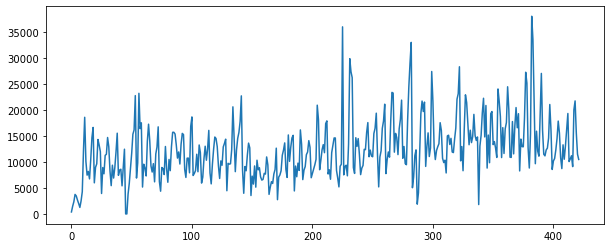

In [381]:
# newg = newg.groupby("DT_REFERENCE")
plt.figure(figsize=(10,4))
plt.plot(newg.SERIES1)
newg = dataset.drop(dataset.columns.difference(['DT_REFERENCE','SERIES1']), 1)

In [382]:
newg.columns

Index(['DT_REFERENCE'], dtype='object')

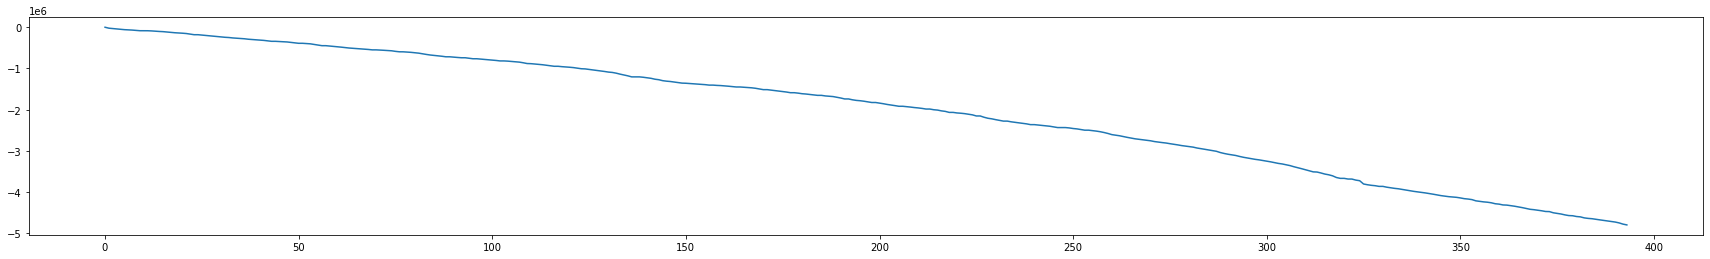

In [323]:
plt.figure(figsize=(30,4))
plt.plot(newg.SERIES2)

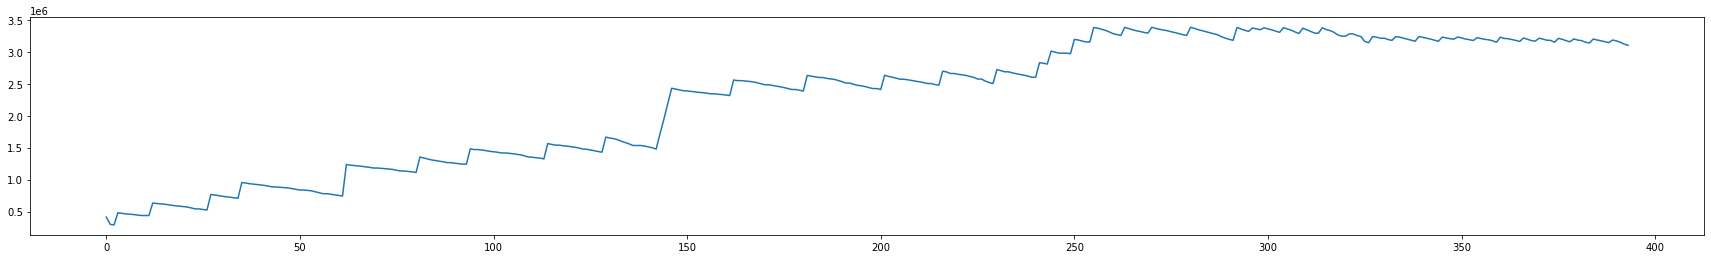

In [327]:
plt.figure(figsize=(30,4))
plt.plot(newg.SERIES3)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

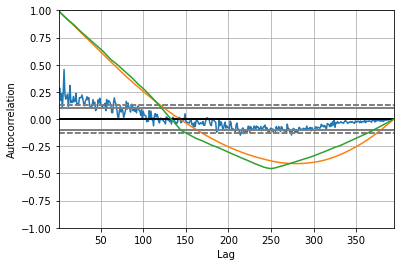

In [328]:
pd.plotting.autocorrelation_plot(newg.SERIES1/100)
pd.plotting.autocorrelation_plot(newg.SERIES2/100)
pd.plotting.autocorrelation_plot(newg.SERIES3/100)